In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from array_io import *
from loess import *

In [15]:
fname = "ascii_rsfs1.csv"
R, I = read_two_arrays(fname)

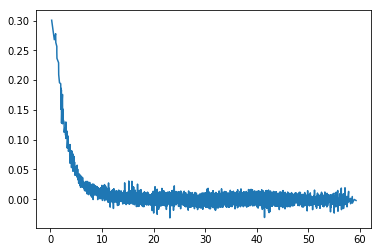

In [16]:
plt.plot(R,I)

In [17]:
dR=0.05*(R.max()-R.min())
print(dR)
I_smooth = loessd(R,I,dx=dR)

2.94974328205


(-0.01, 0.1)

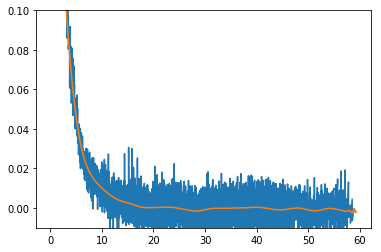

In [18]:
plt.plot(R,I)
plt.plot(R,I_smooth)
plt.ylim([-0.01,0.1])

In [12]:
(I_smooth<0).sum()

3750

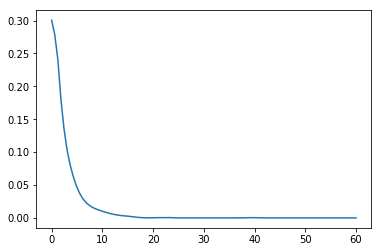

In [19]:
n_resamp = 100
I_smooth_r = I_smooth.copy()
fi = np.where(I_smooth_r<0)[0]
I_smooth_r[fi] = 0
R_resamp = 60*np.arange(n_resamp)/float(n_resamp-1)
I_resamp = np.interp(R_resamp,R,I_smooth_r)
plt.plot(R_resamp,I_resamp)

In [14]:
60*np.arange(n_resamp)/float(n_resamp-1)

array([  0.        ,   0.60606061,   1.21212121,   1.81818182,
         2.42424242,   3.03030303,   3.63636364,   4.24242424,
         4.84848485,   5.45454545,   6.06060606,   6.66666667,
         7.27272727,   7.87878788,   8.48484848,   9.09090909,
         9.6969697 ,  10.3030303 ,  10.90909091,  11.51515152,
        12.12121212,  12.72727273,  13.33333333,  13.93939394,
        14.54545455,  15.15151515,  15.75757576,  16.36363636,
        16.96969697,  17.57575758,  18.18181818,  18.78787879,
        19.39393939,  20.        ,  20.60606061,  21.21212121,
        21.81818182,  22.42424242,  23.03030303,  23.63636364,
        24.24242424,  24.84848485,  25.45454545,  26.06060606,
        26.66666667,  27.27272727,  27.87878788,  28.48484848,
        29.09090909,  29.6969697 ,  30.3030303 ,  30.90909091,
        31.51515152,  32.12121212,  32.72727273,  33.33333333,
        33.93939394,  34.54545455,  35.15151515,  35.75757576,
        36.36363636,  36.96969697,  37.57575758,  38.18

In [20]:
L = np.zeros(n_resamp)
L[0] = np.pi*R_resamp[0]**2  * I_resamp[0]
for i in range(1,n_resamp,1):
    L[i] = L[i-1] + np.pi*(R_resamp[i]**2 - R_resamp[i-1]**2)*I_resamp[i]
    

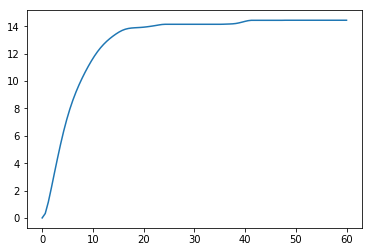

In [21]:
plt.plot(R_resamp,L)

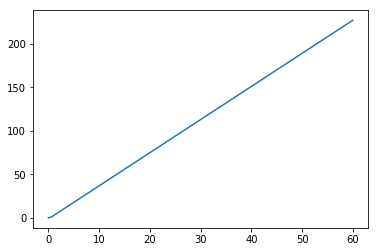

In [22]:
A_resamp = np.zeros(n_resamp)
A_resamp[0] = np.pi*R_resamp[0]**2
for i in range(1,n_resamp,1):
    A_resamp[i] = np.pi*(R_resamp[i]**2 - R_resamp[i-1]**2)
plt.plot(R_resamp,A_resamp)

In [23]:
A = np.pi*R_resamp**2

In [24]:
oo_eta = I_resamp*A/L


/home/ryanhausen/anaconda3/envs/sep/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(0, 10)

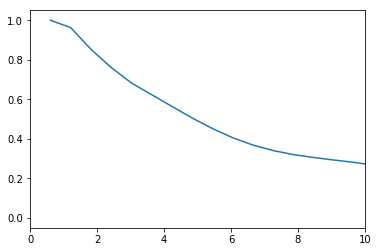

In [25]:
plt.plot(R_resamp,oo_eta)
plt.xlim([0,10])

In [26]:
fi = np.where( (R_resamp<10)&(R_resamp>0))[0]
xx = (oo_eta[fi]-0.2)**2

In [27]:
si = xx.argmin()

In [28]:
R_resamp[fi[si]]

9.6969696969696972

In [29]:
oo_eta[fi[si]]

0.28046244354024813

In [30]:
pi = oo_eta[fi].argsort()

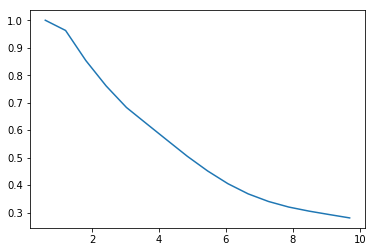

In [31]:
plt.plot(R_resamp[fi[pi]],oo_eta[fi[pi]])

In [32]:
R_p = np.interp(0.2,oo_eta[fi[pi]],R_resamp[fi[pi]])

In [34]:
print(R_p)

9.696969696969697
